In [63]:
import numpy as np
# 读取data.xlsx中的数据
import pandas as pd

data = pd.read_excel('data-cm.xlsx')

In [64]:
# 查看数据的前5行
data

,Unnamed: 0,船长,船高,x1,x2
0,3,0.974381,0.019735,0.054271,0.063529
1,6,1.632454,0.034654,0.073682,0.099415
2,9,1.171768,0.035698,0.075200,0.110373
3,12,0.913274,0.034074,0.065164,0.110408
4,15,0.650493,0.032057,0.062302,0.110964
5,19,0.703797,0.032119,0.073931,0.116257


In [65]:
# 导出为4个参数的数组
# z  = data['船长'].values # m
z = data['船高'].values # m
x1 = data['x1'].values # m
x2 = data['x2'].values # m

print(z)
print(x1 + x2)

[0.01973548 0.03465385 0.03569756 0.03407436 0.03205714 0.03211944]
[0.1178     0.17309744 0.18557317 0.17557179 0.17326667 0.19018857]


In [66]:
E = (2 * z) / (x1 + x2)

print(E)

[0.33506764 0.40039699 0.38472761 0.38815299 0.37003243 0.33776419]


In [67]:
V_sl = 1.2  #m/s
d = 0.05#m 玻璃管内径

hl = d - z

pi = np.pi
R = d/2

# a = pi * (d**2) * np.arccos((d - hl)/d)
# b = 180*(d - hl)*np.sqrt(2*d*hl - hl**2)
# c = 45 * pi * (d**2)
# 
# print(a)
# print(b)
# print(c)
# 
# print((a-b)/c)

# Hl = (pi * (d**2) * np.arccos((d - hl)/d) - 180*(d - hl)*np.sqrt(2*d*hl - hl**2)) / (45 * pi * (d**2))
Al = ((R**2) * np.arccos((R-hl)/R)) - ((R - hl) * np.sqrt((R**2) - (R - hl)**2))

print(Al)

Hl = Al / (pi * (R**2))

print("Hl",Hl)

[0.00124301 0.00051134 0.00046367 0.0005382  0.00063363 0.00063065]
Hl [0.63306231 0.2604209  0.23614669 0.27410274 0.32270739 0.321186  ]


In [68]:
u = 1.01 * (10**(-6)) # m^2/s

a = V_sl * d
b = u * Hl

print(a)
print(b)

Ref = (V_sl * d) / (u * Hl)

print(Ref)

0.06
[6.39392932e-07 2.63025105e-07 2.38508154e-07 2.76843769e-07
 3.25934467e-07 3.24397862e-07]
[ 93839.01034427 228115.10752718 251563.72660413 216728.73570988
 184086.085166   184958.06256659]


In [69]:
theta = np.array(range(3, 19, 3)) / 25

In [70]:
# # E和Ref归一化
# E = (E - np.min(E)) / (np.max(E) - np.min(E))
# Ref = (Ref - np.min(Ref)) / (np.max(Ref) - np.min(Ref))

In [71]:
y = E
x = Ref
x = x.reshape(-1, 1)

print(y)
print(x)

[0.33506764 0.40039699 0.38472761 0.38815299 0.37003243 0.33776419]
[[ 93839.01034427]
 [228115.10752718]
 [251563.72660413]
 [216728.73570988]
 [184086.085166  ]
 [184958.06256659]]


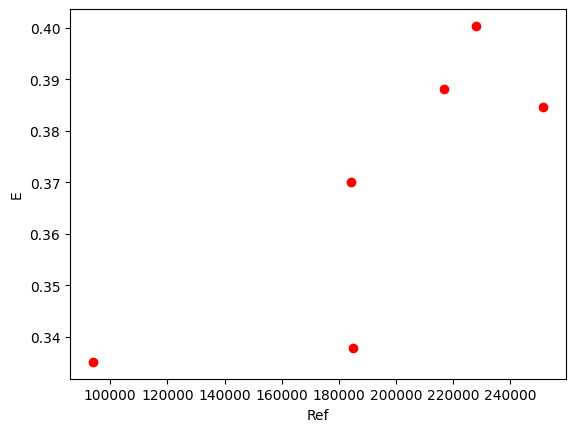

In [75]:
# 绘制Ref 和 E 的图像
import matplotlib.pyplot as plt

plt.scatter(x, y, c='r', marker='o', label='train')


plt.xlabel('Ref')
plt.ylabel('E')

plt.show()

In [76]:
import math
import copy

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return(np.squeeze(cost))

def compute_gradient_matrix(X, y, w, b):
    m,n = X.shape
    f_wb = X @ w + b
    e   = f_wb - y
    dj_dw  = (1/m) * (X.T @ e)
    dj_db  = (1/m) * np.sum(e)

    return dj_db,dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    """

    # number of training examples
    m = len(X)

    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];

    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing

def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    print(initial_w)
    print(initial_w.shape)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                              compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")

    return(w_out, b_out)

(6, 2)
[[9.38390103e+00 8.80575986e+05]
 [2.28115108e+01 5.20365023e+06]
 [2.51563727e+01 6.32843085e+06]
 [2.16728736e+01 4.69713449e+06]
 [1.84086085e+01 3.38876868e+06]
 [1.84958063e+01 3.42094849e+06]]
[0.33506764 0.40039699 0.38472761 0.38815299 0.37003243 0.33776419]
[0. 0.]
(2,)
Iteration         0, Cost: 2.14331e+21
Iteration       100, Cost: nan
Iteration       200, Cost: nan
Iteration       300, Cost: nan
Iteration       400, Cost: nan
Iteration       500, Cost: nan
Iteration       600, Cost: nan
Iteration       700, Cost: nan
Iteration       800, Cost: nan
Iteration       900, Cost: nan
w,b found by gradient descent: w: [nan nan], b: nan


C:\Users\33398\AppData\Local\Temp\ipykernel_23068\3506652082.py:9: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb_i - y[i])**2
C:\Users\33398\AppData\Local\Temp\ipykernel_23068\3506652082.py:17: RuntimeWarning: overflow encountered in matmul
  dj_dw  = (1/m) * (X.T @ e)
C:\Users\33398\AppData\Local\Temp\ipykernel_23068\3506652082.py:45: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw


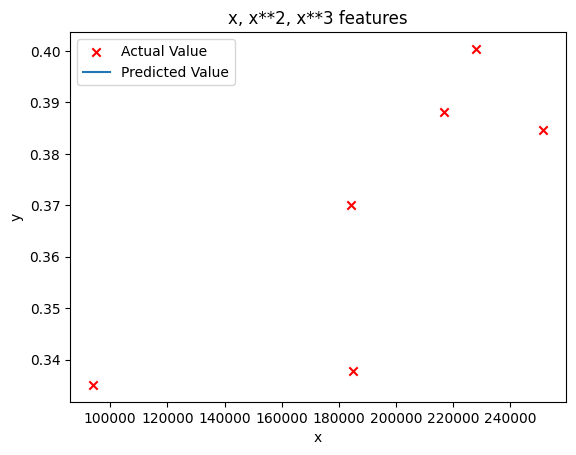

In [78]:
x = np.array(x)
y = np.array(y)

X = np.c_[x/10000,(x**2)/10000]
print(X.shape)

print(X)
print(y)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=0.01)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()